In [1]:
from sklearn.metrics import mean_squared_error as mse 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from numpy import sqrt 

df = pd.read_csv("AirPassengers.csv")
df.head()


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


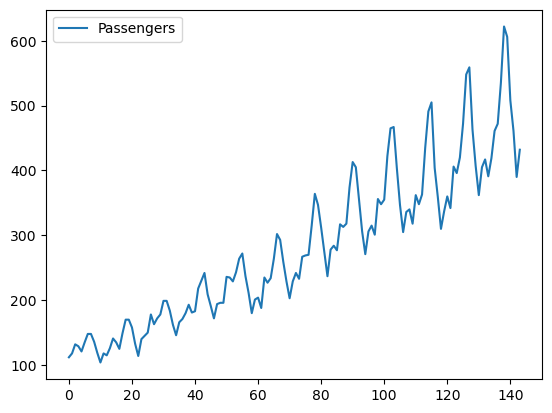

In [2]:
df.plot()
plt.show()

y = df['Passengers']

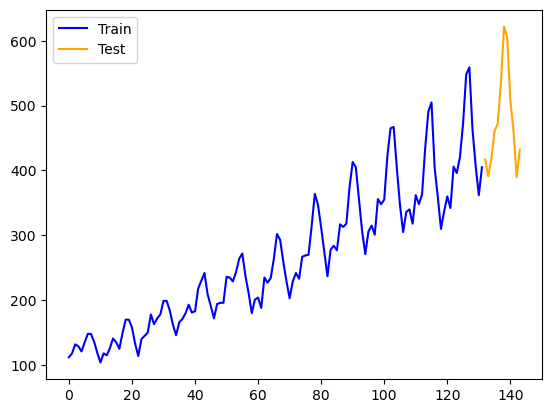

In [3]:
y_train = df['Passengers'][:-12]
y_test = df['Passengers'][-12:]
plt.plot(y_train, label='Train',color='blue')
plt.plot(y_test, label='Test',color='orange')
plt.legend(loc='best')
plt.show()

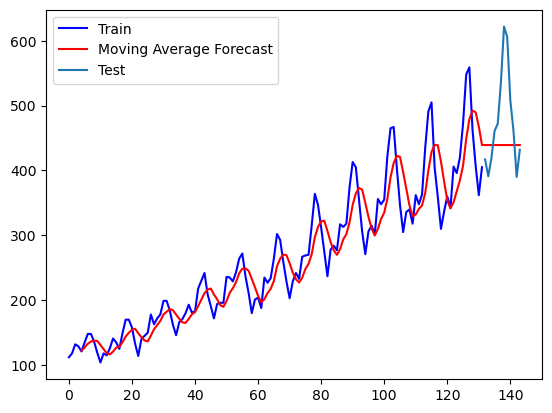

MSE = 6906.006666666668


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

In [5]:
#### 1)Trailing Rolling Mean
fcast = y_train.rolling(5,center=False).mean()
lastMA = fcast.iloc[-1]
fSeries = pd.Series(lastMA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, fSeries],
                     ignore_index=True)
plt.plot(y_train, label='Train',color='blue')
plt.plot(MA_fcast, label='Moving Average Forecast',
         color='red')
plt.plot(y_test, label="Test")
plt.legend(loc='best')
plt.show()
print("MSE =",mse(y_test, fSeries))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


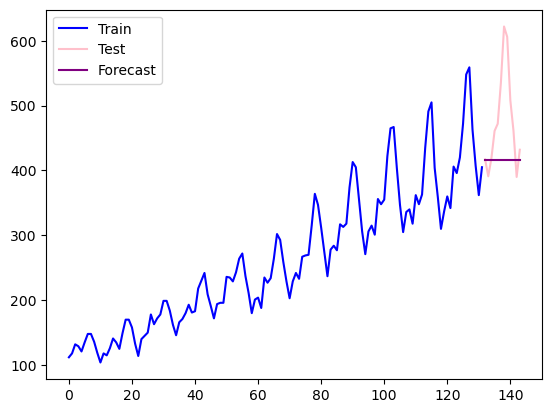

RMSE = 96.05044973178168


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

In [6]:
# Simple Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
alpha = 0.1
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.legend(loc='best')
plt.show()

print("RMSE =",sqrt(mse(y_test, fcast1)))

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

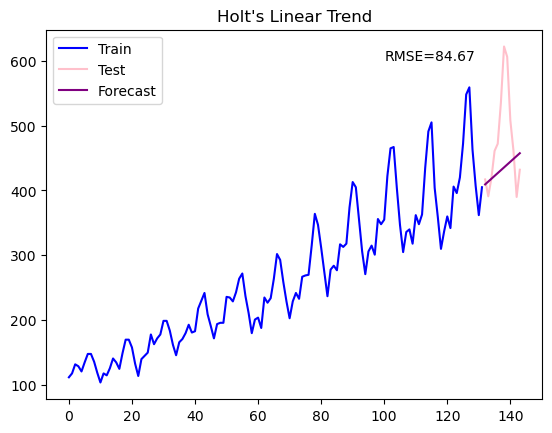

MSE = 7169.260542802793


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

In [7]:
# Holt's Linear Method
alpha = 0.8
beta = 0.02
### Linear Trend
from statsmodels.tsa.api import Holt
holt = Holt(y_train)
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("Holt's Linear Trend")
plt.legend(loc='best')
plt.show()

print("MSE =",mse(y_test, fcast1))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib

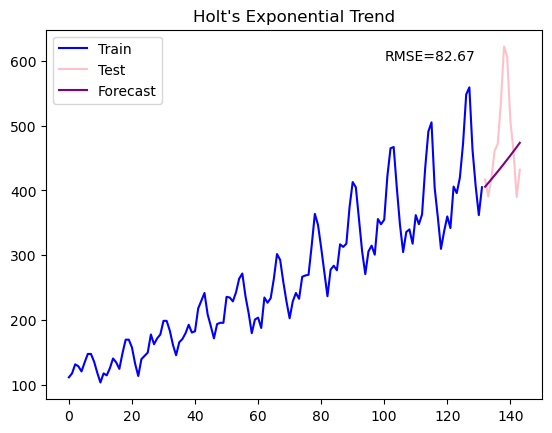

In [8]:
# Holt's Exponential Method
alpha = 0.8
beta = 0.02
### Linear Trend
holt = Holt(y_train, exponential=True)
fit1 = holt.fit(smoothing_level=alpha, 
                smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("Holt's Exponential Trend")
plt.legend(loc='best')
plt.show()

#print("MSE =",mse(y_test, fcast1))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib

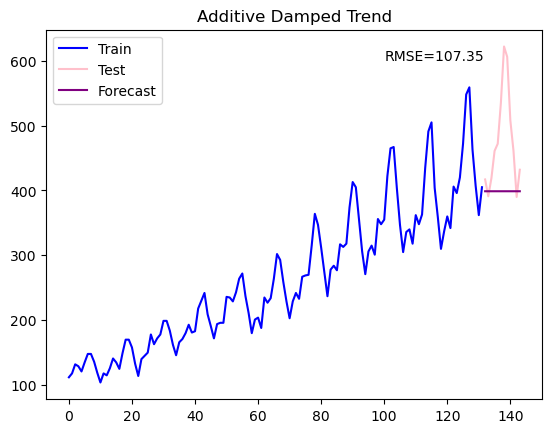

In [9]:
### Additive Damped Trend
alpha = 0.8
beta = 0.02
phi = 0.1
add_damp = Holt(y_train, damped_trend=True)
fit3 = add_damp.fit(smoothing_level=alpha, 
                    smoothing_trend=beta, 
                    damping_trend=phi)
fcast3 = fit3.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast3.plot(color="purple", label='Forecast')
error = round(sqrt(mse(y_test, fcast3)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("Additive Damped Trend")
plt.legend(loc='best')
plt.show()

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib

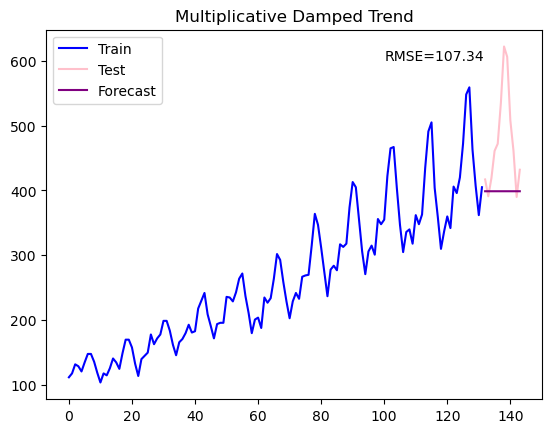

In [10]:
### Multiplicative Damped Trend
alpha = 0.8
beta = 0.02
phi = 0.1
mult_damp = Holt(y_train, damped_trend=True, 
                exponential=True)
fit3 = mult_damp.fit(smoothing_level=alpha, 
                    smoothing_trend=beta, 
                    damping_trend=phi)
fcast3 = fit3.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast3.plot(color="purple", label='Forecast')
error = round(sqrt(mse(y_test, fcast3)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("Multiplicative Damped Trend")
plt.legend(loc='best')
plt.show()

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

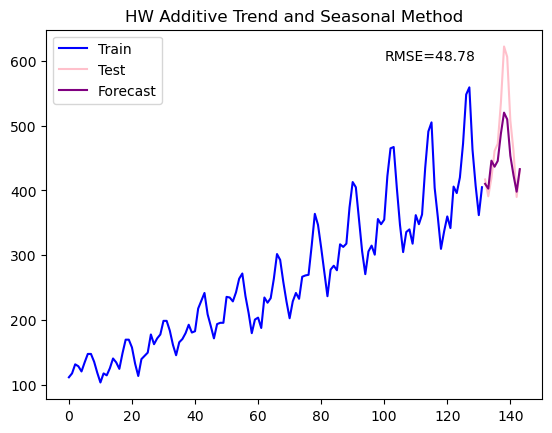

In [11]:
# Holt-Winters' Method

########### Additive #####################
from statsmodels.tsa.api import ExponentialSmoothing
alpha = 0.8
beta = 0.02
gamma = 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='add')
fit1 = hw_add.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend(loc='best')
plt.show()

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

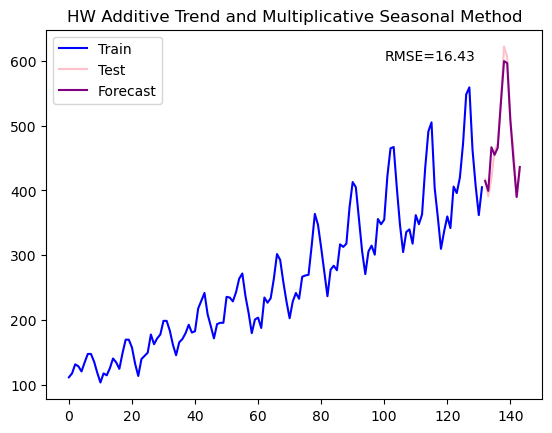

In [15]:
########### Multiplicative #####################
alpha = 0.8
beta = 0.02
gamma = 0.1
phi=0.1
hw_mul = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='mul')
fit1 = hw_mul.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma,damping_trend=phi)
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Multiplicative Seasonal Method")
plt.legend(loc='best')
plt.show()

/tmp/ipykernel_26019/3077109038.py:5: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_add = ExponentialSmoothing(y_train, seasonal_periods=12,
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils

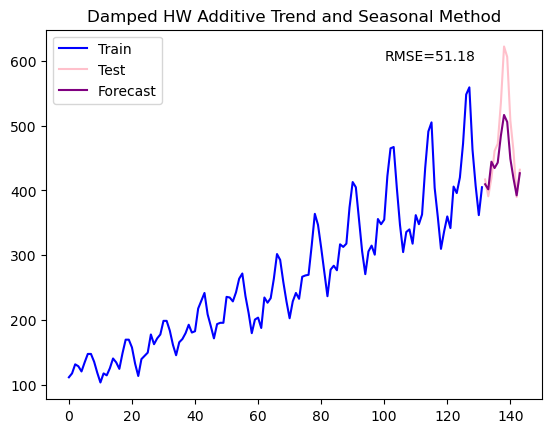

In [13]:
########### Seasonal Additive & Damped #####################
alpha = 0.8
beta = 0.02
gamma = 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='add',
                            damped=True)
fit1 = hw_add.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("Damped HW Additive Trend and Seasonal Method")
plt.legend(loc='best')
plt.show()

/tmp/ipykernel_26019/2439086774.py:6: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_mul = ExponentialSmoothing(y_train, seasonal_periods=12,
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils

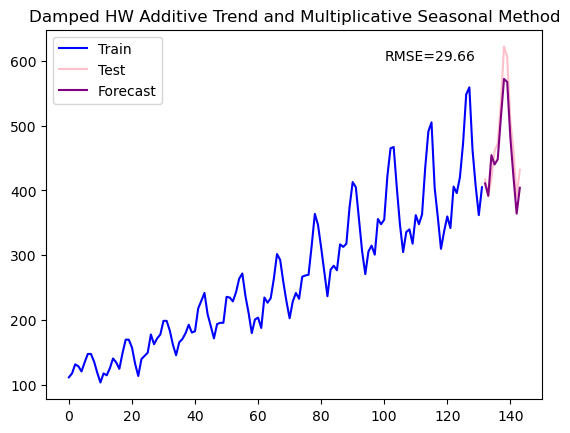

In [16]:
########### Seasonal Multiplicative & Damped #####################
alpha = 0.8
beta = 0.02
gamma = 0.1
phi=0.1
hw_mul = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='mul',
                            damped=True)
fit1 = hw_mul.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma,damping_trend=phi)
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
error = round(sqrt(mse(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("Damped HW Additive Trend and Multiplicative Seasonal Method")
plt.legend(loc='best')
plt.show()